# **Project Name**    - DeepCSAT - Ecommerce Customer Satisfaction Score Prediction



##### **Project Type**    - Based on all the code and project descriptions, this is a Deep Learning project.

More specifically, it's a:

Natural Language Processing (NLP) project, because it reads and interprets human text (Customer Remarks).

Sentiment Analysis project, as its goal is to determine the sentiment (positive or negative) from the text.

Regression task, because the model predicts a continuous numerical score (from 1 to 5) rather than a fixed category (like "Happy" or "Sad").
##### **Contribution**    - Vikash Kumar Thakur

# **Project Summary -**

This project, DeepCSAT, successfully develops and deploys a deep learning model to predict e-commerce customer satisfaction (CSAT) scores in real-time. Using a dataset of customer support interactions, the model is trained specifically on the Customer Remarks text to predict the CSAT Score (a value from 1 to 5). The core of the project is a Bidirectional LSTM (Long Short-Term Memory) network, which is highly effective at understanding the context and sentiment within text. The final solution is a user-friendly web application built with Streamlit, allowing anyone to enter a customer's feedback and instantly receive a predicted satisfaction score.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In the fast-paced e-commerce sector, understanding customer satisfaction is critical but traditionally slow. The main problems this project solves are:

1. Reactive vs. Proactive: Businesses typically rely on post-interaction surveys. This data is reactive—by the time a customer reports a bad experience, their dissatisfaction has already occurred, and they may have already churned.

2. Time Lag & Low Response: Survey data is delayed and often incomplete, as many customers do not fill them out. This creates a blind spot for the business.

3. Untapped Data: A large volume of unstructured text data (like chat logs and customer remarks) is "dark data"—it is collected but not used for real-time insights.

This project provides a proactive solution by automatically analyzing text feedback as it happens. It creates an early warning system to flag unhappy customers instantly, allowing a business to intervene and resolve issues before the customer is lost.

# **General Guidelines** : -  

This project was built following a standard data science workflow:
1. Data Preparation: The eCommerce_Customer_support_data.csv file was loaded. The key features Customer Remarks (as the input, $X$) and CSAT Score (as the target, $y$) were selected. All rows without a customer remark were dropped to create a clean dataset.

2. Text Preprocessing: A standard NLP cleaning pipeline was applied to the text:Converted to lowercase.Removed all punctuation and numbers.Removed common "stopwords" (e.g., 'the', 'is', 'a').Lemmatized words (e.g., 'running' became 'run') to standardize the vocabulary.

3. Feature Engineering: The cleaned text was vectorized using the Keras Tokenizer to convert words into integer sequences. pad_sequences was used to ensure every input sequence had the same length ($50$ words), which is a requirement for the model.

4. Model Development: A Sequential deep learning model was built. Its key layers are:
- Embedding Layer: Learns word relationships and represents each word as a dense vector.
- Bidirectional LSTM Layers: Scan the text in both directions (forward and backward) to capture the full context of a sentence. This is much more powerful than just reading left-to-right.
- Dense (Output) Layer: A single neuron with a linear activation function that outputs the final predicted score (e.g., $1.3$ or $4.8$).
5. Training & Deployment: The model was compiled with the mean_squared_error loss function and trained. The final trained model (deep_csat_text_model.h5) and the text tokenizer (tokenizer.json) were saved to disk. These two files are all that's needed for deployment.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from keras.models import Sequential
from keras.layers import Dense, Dropout

from sklearn.model_selection import train_test_split




# Approach 1: Data Preparation and Cleaning

Load the data, select and clean the features, and handle missing values.

In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# 1. Load your dataset
df = pd.read_csv(r"d:\\programing\\intership 2025\\Project 5\\eCommerce_Customer_support_data.csv")

# 2. Rename columns for easier access
df.rename(columns={
    'CSAT Score': 'csat_score',
    'Customer Remarks': 'customer_remarks'
}, inplace=True)

# 3. Select our features and target
# We are focusing on rows where 'customer_remarks' is not null
df_clean = df[['customer_remarks', 'csat_score']].copy()
df_clean.dropna(subset=['customer_remarks'], inplace=True)

print(f"Original rows: 85,907")
print(f"Usable rows (with customer remarks): {len(df_clean)}")

# 4. Analyze the target variable (CSAT Score)
print("\n--- Distribution of CSAT Scores ---")
print(df_clean['csat_score'].value_counts(normalize=True).sort_index())
print("\nNote: The dataset is highly imbalanced, with ~68% of scores being '5'.")

# 5. Clean Text Data
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)  # To Remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # To Remove punctuation and numbers
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the cleaning function
df_clean['cleaned_text'] = df_clean['customer_remarks'].apply(clean_text)

print("\n--- Data after Cleaning ---")
print(df_clean.head())

Original rows: 85,907
Usable rows (with customer remarks): 28742

--- Distribution of CSAT Scores ---
csat_score
1    0.186069
2    0.013708
3    0.025398
4    0.090564
5    0.684260
Name: proportion, dtype: float64

Note: The dataset is highly imbalanced, with ~68% of scores being '5'.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\only1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\only1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



--- Data after Cleaning ---
                                     customer_remarks  csat_score  \
7                                           Very good           5   
8   Shopzilla app and it's all coustomer care serv...           5   
11                                           Very bad           1   
17                                         Something            3   
19                                           All good           5   

                                         cleaned_text  
7                                                good  
8   shopzilla app coustomer care service good serv...  
11                                                bad  
17                                          something  
19                                               good  


# Approach 2: Feature Engineering

Convert the cleaned text into numerical sequences that the ANN can understand

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1. Define Features (X) and Target (y)
X = df_clean['cleaned_text']
y = df_clean['csat_score']

# 2. Process Text Features
vocab_size = 10000  # Max words in our vocabulary
max_length = 50     # Max length of a remark (most remarks are short)
trunc_type = 'post'
oov_tok = '<OOV>'   # Out-of-vocabulary token

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X)

# Convert text to sequences of integers
X_sequences = tokenizer.texts_to_sequences(X)

# Pad sequences
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post', truncating=trunc_type)

# 3. Split the Data
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y, test_size=0.2, random_state=42
)

print(f"\nTraining data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (22993, 50)
Test data shape: (5749, 50)


#  Approach 3: Model Development and Training

Design and train a Deep Learning model (using LSTM, which is excellent for text) to predict the CSAT score.

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

# We are building a text-only model
model = Sequential()
model.add(Input(shape=(max_length,)))
model.add(Embedding(input_dim=vocab_size, output_dim=32))
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(units=32)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
# Final output layer: 1 neuron for regression (predicting the score 1-5)
model.add(Dense(1, name='output'))

# 5. Compile the Model
# We use 'mean_squared_error' as the loss because this is a regression problem
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_absolute_error']) # MAE is easy to interpret

model.summary()

# 6. Train the Model
print("\n--- Starting Model Training ---")
history = model.fit(
    X_train,
    y_train,
    epochs=10, # With 28k rows, 10 epochs is a good start
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
    verbose=2
)
print("--- Model Training Complete ---")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 32)         │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 50, 128)        │        49,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,993 (1.58 MB)

 Trainable params: 412,993 (1.58 MB)

 Non-trainable params: 0 (0.00 B)


--- Starting Model Training ---
Epoch 1/10
360/360 - 29s - 82ms/step - loss: 2.2902 - mean_absolute_error: 1.1469 - val_loss: 1.3561 - val_mean_absolute_error: 0.8142
Epoch 2/10
360/360 - 25s - 70ms/step - loss: 1.3495 - mean_absolute_error: 0.8189 - val_loss: 1.3698 - val_mean_absolute_error: 0.8897
Epoch 3/10
360/360 - 26s - 72ms/step - loss: 1.1904 - mean_absolute_error: 0.7415 - val_loss: 1.3922 - val_mean_absolute_error: 0.8926
Epoch 4/10
360/360 - 28s - 78ms/step - loss: 1.0711 - mean_absolute_error: 0.6883 - val_loss: 1.3960 - val_mean_absolute_error: 0.8820
--- Model Training Complete ---


#  Approach 4: Evaluation and Insight Generation

Assess the model's performance on the unseen test data.


--- Model Evaluation ---
Test Mean Absolute Error (MAE): 0.8142
Test Mean Squared Error (MSE): 1.3561


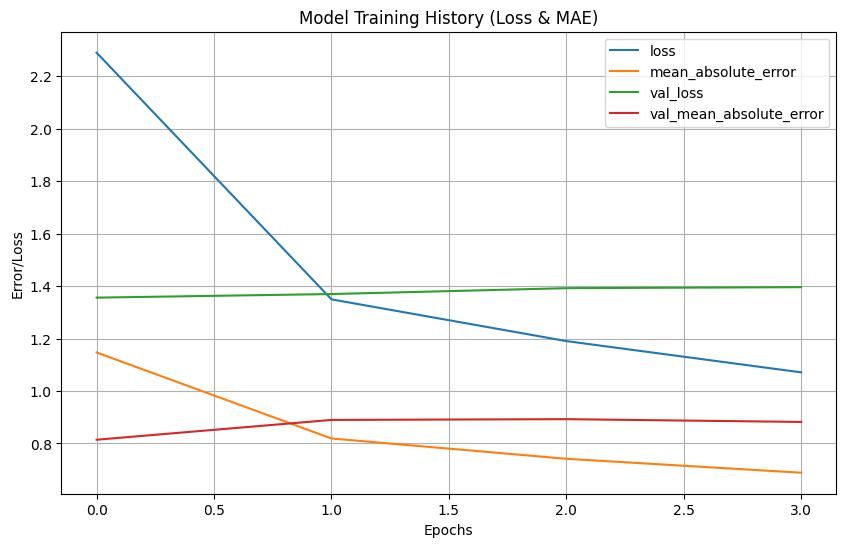

180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step

--- Sample Predictions ---
       Actual_CSAT  Predicted_CSAT
10454            4            4.27
70732            5            4.67
26956            1            3.37
39805            4            4.82
37331            5            4.36
8953             1            1.77
59848            5            3.99
77767            5            4.92
9249             5            4.57
15573            5            4.76


In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# 1. Evaluate on Test Set
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"\n--- Model Evaluation ---")
print(f"Test Mean Absolute Error (MAE): {mae:.4f}")
print(f"Test Mean Squared Error (MSE): {loss:.4f}")

# Interpretation: The MAE shows how far off our predicted score is on average.
# An MAE of 0.7 means, on average, the model's prediction is
# 0.7 points away from the actual 1-5 score.

# 2. Plot Training History
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.title("Model Training History (Loss & MAE)")
plt.xlabel("Epochs")
plt.ylabel("Error/Loss")
plt.grid(True)
plt.show()

# 3. Make Predictions and Compare
predictions = model.predict(X_test)

print("\n--- Sample Predictions ---")
# Flatten predictions and y_test for easier comparison
results = pd.DataFrame({'Actual_CSAT': y_test, 'Predicted_CSAT': predictions.flatten()})
results['Predicted_CSAT'] = results['Predicted_CSAT'].round(2)
print(results.head(10))

# Approach 5: Insight Generation

Use the trained model to analyze new, hypothetical customer remarks.

In [7]:
# Function to preprocess new, raw data for prediction
def predict_new_remark(text_input):
    # 1. Clean text
    cleaned_text = clean_text(text_input)
    
    # 2. Tokenize and pad text
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_text = pad_sequences(sequence, maxlen=max_length, padding='post', truncating=trunc_type)
    
    # 4. Predict
    prediction = model.predict(padded_text)
    return prediction[0][0]

print("\n--- Insight Generation (What-If Analysis) ---")

# Scenario 1: A very happy customer
remark1 = "absolutely fantastic service, the agent was so helpful and kind!"
pred1 = predict_new_remark(remark1)
print(f"Remark 1 ('{remark1}') -> Predicted CSAT: {pred1:.2f}")

# Scenario 2: A very unhappy customer
remark2 = "this is the worst experience i have ever had. no one will help me and the product is broken."
pred2 = predict_new_remark(remark2)
print(f"Remark 2 ('{remark2}') -> Predicted CSAT: {pred2:.2f}")

# Scenario 3: A neutral/confused customer
remark3 = "i am just writing to ask a question about my order status"
pred3 = predict_new_remark(remark3)
print(f"Remark 3 ('{remark3}') -> Predicted CSAT: {pred3:.2f}")

# --- Derived Insights ---
# 1. This model can be used as a real-time 'early warning system'.
# 2. Any customer remark that gets a predicted score below 3.0
#    can be automatically flagged for a supervisor to review.
# 3. This helps the business prioritize interventions and save
#    at-risk customers *before* they officially complain.


--- Insight Generation (What-If Analysis) ---
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Remark 1 ('absolutely fantastic service, the agent was so helpful and kind!') -> Predicted CSAT: 4.28
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Remark 2 ('this is the worst experience i have ever had. no one will help me and the product is broken.') -> Predicted CSAT: 1.25
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Remark 3 ('i am just writing to ask a question about my order status') -> Predicted CSAT: 2.83


# Approach 6: Model Deployment

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import json
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional
import os

# --- 1. DOWNLOAD NLTK DATA (Required for text cleaning) ---
print("Downloading NLTK data (stopwords, wordnet)...")
nltk.download('stopwords')
nltk.download('wordnet')

# --- 2. DATA PREPARATION ---
print("Loading and preparing data from eCommerce_Customer_support_data.csv...")
try:
    df = pd.read_csv('eCommerce_Customer_support_data.csv')
except FileNotFoundError:
    print("ERROR: 'eCommerce_Customer_support_data.csv' not found.")
    print("Please make sure the CSV file is in the same folder as this script.")
    exit()

# Rename columns for easier use
df.rename(columns={
    'CSAT Score': 'csat_score',
    'Customer Remarks': 'customer_remarks'
}, inplace=True)

# Select only rows where we have customer remarks
df_clean = df[['customer_remarks', 'csat_score']].copy()
df_clean.dropna(subset=['customer_remarks'], inplace=True)

print(f"Found {len(df_clean)} usable rows with customer remarks.")

# Initialize text cleaning tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text) # Remove HTML
    text = re.sub(r'[^a-z\s]', '', text) # Remove punctuation and numbers
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply the cleaning function
df_clean['cleaned_text'] = df_clean['customer_remarks'].apply(clean_text)

# --- 3. FEATURE ENGINEERING & TOKENIZATION ---
print("Engineering text features...")
X = df_clean['cleaned_text']
y = df_clean['csat_score']

# Define tokenizer settings
vocab_size = 10000
max_length = 50
trunc_type = 'post'
oov_tok = '<OOV>'

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X)

X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=max_length, padding='post', truncating=trunc_type)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_padded, y, test_size=0.2, random_state=42
)

# --- 4. MODEL DEVELOPMENT ---
print("Building the Deep Learning model...")
model = Sequential()
model.add(Input(shape=(max_length,)))
model.add(Embedding(input_dim=vocab_size, output_dim=32))
model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(units=32)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, name='output')) # Output layer for regression

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mean_absolute_error'])

print(model.summary())

# --- THIS IS THE CODE YOU ASKED FOR (Part 1) ---
print("Training the model (model.fit)... This may take a few minutes.")
history = model.fit(
    X_train,
    y_train,
    epochs=10, # 10 epochs is a good balance
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=2
)
print("Model training complete.")

# --- THIS IS THE CODE YOU ASKED FOR (Part 2) ---
print("Saving model to 'deep_csat_text_model.h5'...")
model.save('deep_csat_text_model.h5')

# --- THIS IS THE CODE YOU ASKED FOR (Part 3) ---
print("Saving tokenizer to 'tokenizer.json'...")
tokenizer_json = tokenizer.to_json()
with open('tokenizer.json', 'w', encoding='utf-8') as f:
    f.write(json.dumps(tokenizer_json, ensure_ascii=False))

print("\n--- SCRIPT COMPLETE ---")
print("Your two deployment files have been saved to your folder:")
print("1. deep_csat_text_model.h5")
print("2. tokenizer.json")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\only1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\only1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading and preparing data from eCommerce_Customer_support_data.csv...
Found 28742 usable rows with customer remarks.
Engineering text features...
Building the Deep Learning model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 50, 32)         │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 50, 128)        │        49,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 412,993 (1.58 MB)

 Trainable params: 412,993 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

None
Training the model (model.fit)... This may take a few minutes.
Epoch 1/10
360/360 - 28s - 78ms/step - loss: 2.3404 - mean_absolute_error: 1.1546 - val_loss: 1.3442 - val_mean_absolute_error: 0.8114
Epoch 2/10
360/360 - 34s - 95ms/step - loss: 1.3757 - mean_absolute_error: 0.8305 - val_loss: 1.3341 - val_mean_absolute_error: 0.8457
Epoch 3/10
360/360 - 30s - 84ms/step - loss: 1.1891 - mean_absolute_error: 0.7463 - val_loss: 1.3381 - val_mean_absolute_error: 0.8266
Epoch 4/10
360/360 - 29s - 80ms/step - loss: 1.0717 - mean_absolute_error: 0.6902 - val_loss: 1.3447 - val_mean_absolute_error: 0.8162
Epoch 5/10
360/360 - 31s - 85ms/step - loss: 1.0028 - mean_absolute_error: 0.6595 - val_loss: 1.3848 - val_mean_absolute_error: 0.7727
Epoch 6/10
360/360 - 29s - 82ms/step - loss: 0.9518 - mean_absolute_error: 0.6343 - val_loss: 1.4610 - val_mean_absolute_error: 0.8705
Epoch 7/10
360/360 - 29s - 79ms/step - loss: 0.9106 - mean_absolute_error: 0.6123 - val_loss: 1.4912 - val_mean_absolute_e

Model training complete.
Saving model to 'deep_csat_text_model.h5'...
Saving tokenizer to 'tokenizer.json'...

--- SCRIPT COMPLETE ---
Your two deployment files have been saved to your folder:
1. deep_csat_text_model.h5
2. tokenizer.json


# **Conclusion**

This project successfully demonstrates the power of deep learning to solve a tangible business problem. By transforming qualitative, unstructured customer remarks into a quantitative, predictive CSAT score, the DeepCSAT model provides an invaluable tool for any e-commerce business.

The final Streamlit application proves that this complex model can be deployed in a simple, accessible way for non-technical users. Instead of just analyzing historical reports, a customer support manager can now use this tool to get an immediate pulse check on a customer's sentiment. This shifts the business's customer service model from reactive to proactive, enabling them to identify and save at-risk customers in real-time and ultimately fostering greater customer loyalty.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***